NVIDIA GeForce RTX 3090
[(0, ('♫', 'NOTES')), (1, ('♠', 'SPADE')), (2, ('♣', 'CLUB')), (3, ('♥', 'HEART')), (4, ('♦', 'DIAMOND')), (5, ('✈', 'AIRPLANE')), (6, ('☂', 'UMBRELLA')), (7, ('☘', 'SHAMROCK')), (8, ('🟊', 'STAR')), (9, ('🞺', 'ASTERISK'))]


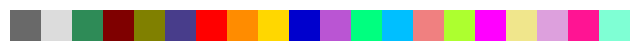

In [1]:
# import os
# os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID' 
# os.environ['CUDA_VISIBLE_DEVICES']='1'
# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

import torch
from torchvision.utils import make_grid
from torchvision import transforms

from PIL import ImageFont, ImageDraw, Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import math

print(torch.cuda.get_device_name(0))

device = torch.device("cuda:0")

emoji_codes = [0x266b,0x2660,0x2663,0x2665,0x2666,0x2708,0x2602,0x2618, 0x1f7ca, 0x1f7ba]
emoji_names = ['NOTES', 'SPADE', 'CLUB', 'HEART', 'DIAMOND', 'AIRPLANE', 'UMBRELLA', 'SHAMROCK', 'STAR', 'ASTERISK']
print(list(enumerate(zip([chr(c) for c in emoji_codes], emoji_names))))

def hex_to_rgb(hex_color):
    hex_color = hex_color.strip('#')
    if len(hex_color) == 3:
        hex_color = ''.join(c * 2 for c in hex_color)
    r = int(hex_color[0:2], 16)
    g = int(hex_color[2:4], 16)
    b = int(hex_color[4:6], 16)
    return (r, g, b)

css_colors = ['#696969', '#dcdcdc', '#2e8b57', '#7f0000', '#808000', '#483d8b', '#ff0000', '#ff8c00', '#ffd700', '#0000cd', '#ba55d3', '#00ff7f', '#00bfff', '#f08080', '#adff2f', '#ff00ff', '#f0e68c', '#dda0dd', '#ff1493', '#7fffd4']

rgb_colors = [hex_to_rgb(c) for c in css_colors]

fig, ax = plt.subplots(figsize=(8, 2))
ax.imshow([rgb_colors])
ax.axis('off');

In [2]:
def make_emoji_grid(emoji_list, emojis_per_line=10):
    imgs = []
    masks = []

    for code_point in emoji_list:
        larger_size = math.ceil(size*(2)**0.5)
        # mask = mask.rotate(randint(-180,180), expand=1)
        print('larger_size', larger_size)
        background_color = colors[randint(0, len(colors)-1)]
        emoji_color = colors[randint(0, len(colors)-1)]
        while emoji_color == background_color:
            emoji_color = colors[randint(0, len(colors)-1)]
        mask = draw_emoji(code_point, font, rgb_colors)
        img = Image.new('RGB', (img_size, img_size), color=background_color)
        img.paste(ImageOps.colorize(mask, (0,0,0), emoji_color), (0,0), mask)

        img = torch.from_numpy(np.array(img)).permute(2,0,1).float() / 255
        # img = torch.nn.functional.interpolate(img.unsqueeze(0), size=(100,100), mode='area').squeeze(0)
        imgs.append(img)
    imgs = torch.stack(imgs)
    return make_grid(imgs, nrow=emojis_per_line).permute(1,2,0).numpy()
    
# font = ImageFont.truetype('Symbola_hint.ttf', 120, encoding='unic')

# # Unicode code points for emojis range (you can modify this if needed)
# start_code_point = 0x265f  # U+1F600
# end_code_point = start_code_point+1100    # U+1F64F

# # Printing emojis in the given range
# # print_emojis(start_code_point, end_code_point)
# plt.figure(figsize=(20,20))
# plt.imshow(make_emoji_grid(emoji_codes, emojis_per_line=len(emoji_codes)))
# plt.axis('off');



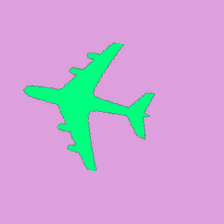

In [3]:
from EmojiGenerator import EmojiGenerator

gen = EmojiGenerator(rgb_colors, emoji_codes, img_size=224, emoji_min_max_size=(130, 130), font_size=120)
(img, mask), _ = gen.generate_random_image()


# plt.imshow(mask, cmap='gray')
img

In [6]:
# generate dataset
# import pathlib
# import csv


# path = pathlib.Path('emoji_ds')

# path.mkdir(exist_ok=True)

# with open('params.csv', 'w') as f:
#     writer = csv.writer(f)
#     writer.writerow(['emoji_code_idx', 'background_color_idx', 'emoji_color_idx', 'angle', 'loc', 'img_path', 'mask_path'])
#     for i, (img, mask, params) in enumerate(gen.generate_dataset(loc_step=14, angle_step=20)):
#         img_path = path/f'img_{params[0]:02d}_{params[1]:02d}_{params[2]:02d}_{params[3]:03d}_{params[4][0]:03d}x{params[4][1]:03d}.png'
#         mask_path = path/f'mask_{params[0]:02d}_{params[1]:02d}_{params[2]:02d}_{params[3]:03d}_{params[4][0]:03d}x{params[4][1]:03d}.npy'
#         img.save(img_path)
#         # np.save(img_path, np.array(img))
#         # np.save(mask_path, np.array(mask))

#         writer.writerow([*params, img_path, mask_path])




In [7]:
# make grid of images
# s=100
# size = 224 - s
# emoji_code_idx=0
# angle=0
# background_color_idx=0
# emoji_color_idx=1
# imgs = []
# stop = 1500
# locs = []
# for loc_idx in range(0, size**2): 
#     if loc_idx > stop:
#         break
#     scaled_loc = (size+(100-s)//2)
#     loc = (loc_idx//scaled_loc, loc_idx%scaled_loc)
#     img, mask = gen.generate_image(loc, background_color_idx, emoji_color_idx, emoji_code_idx, angle, s)
#     if(loc_idx>1000):
#         locs.append(loc)
#         imgs.append(img)

# imgs = torch.stack([torch.from_numpy(np.array(img)).permute(2,0,1).float() / 255 for img in imgs])
# imgs = make_grid(imgs, nrow=10).permute(1,2,0).numpy()
# plt.figure(figsize=(20,20))
# plt.imshow(imgs)

In [8]:
def plot_images_in_line(image_list, figsize=(12, 4), interpolation='none'):
    num_images = len(image_list)

    fig, axes = plt.subplots(1, num_images, figsize=figsize)

    for i, image_path in enumerate(image_list):
        if isinstance(image_path, str):
            img = Image.open(image_path)
        elif isinstance(image_path, Image.Image):
            img = image_path
        else:
            raise ValueError("Unsupported image format. Use image file paths or PIL Image objects.")

        axes[i].imshow(img, interpolation=interpolation)
        axes[i].axis('off')

    plt.tight_layout()



In [9]:
def generate_harmonic_colors(num_colors):
    colors = []
    while len(colors) < num_colors:
        # Generate random H, S, and L values in the valid range for harmonious colors
        h = random.random()
        s = random.uniform(0.4, 0.6)  # Saturation in the range [0.4, 0.6]
        l = random.uniform(0.4, 0.6)  # Lightness in the range [0.4, 0.6]

        # Convert HSL to RGB
        q = l + s - l * s if l < 0.5 else l + s - l * s * 2
        p = 2 * l - q

        r = hue_to_rgb(p, q, h + 1/3)
        g = hue_to_rgb(p, q, h)
        b = hue_to_rgb(p, q, h - 1/3)

        # Scale RGB values to [0, 255]
        r, g, b = int(r * 255), int(g * 255), int(b * 255)

        color_tuple = (r, g, b)

        # Check if the color is distinct (not already in the list)
        if color_tuple not in colors:
            colors.append(color_tuple)

    return colors

def hue_to_rgb(p, q, t):
    if t < 0:
        t += 1
    if t > 1:
        t -= 1
    if t < 1/6:
        return p + (q - p) * 6 * t
    if t < 1/2:
        return q
    if t < 2/3:
        return p + (q - p) * (2/3 - t) * 6
    return p

# Generate 20 distinct and harmonic RGB colors
# num_colors = 20
# colors_list = generate_harmonic_colors(num_colors)

# # Print the list of colors
# print(colors_list)


# fig, ax = plt.subplots(figsize=(8, 2))
# ax.imshow([colors_list])
# ax.axis('off')

In [34]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

import pytorch_lightning as pl
from pl_bolts.models.self_supervised.simclr import (
    SimCLREvalDataTransform,
    SimCLRTrainDataTransform
)

# SimCLRTrainDataTransform:
    # RandomResizedCrop(size=self.input_height)
    # RandomHorizontalFlip()
    # RandomApply([color_jitter], p=0.8)
    # RandomGrayscale(p=0.2)
    # RandomApply([GaussianBlur(kernel_size=int(0.1 * self.input_height))], p=0.5)
    # transforms.ToTensor()

# SimCLREvalDataTransform:
    # Resize(input_height + 10, interpolation=3)
    # transforms.CenterCrop(input_height),
    # transforms.ToTensor()

class EmojiDataset(Dataset):
    def __init__(self, emoji_generator, train_transform=None, eval_transform=None):
        self.emoji_generator = emoji_generator
        self.train_transform = train_transform
        self.eval_transform = eval_transform

    def __len__(self):
        return 10000000

    def __getitem__(self, idx):
        # Generate a random image and its metadata using the EmojiGenerator
        (img, _), _ = self.emoji_generator.generate_random_image()
        
        # Apply the appropriate transform based on training or evaluation phase
        if self.train_transform:
            img = self.train_transform(img)
        elif self.eval_transform:
            img = self.eval_transform(img)

        # Convert PIL images to tensors
        transform_to_tensor = transforms.Compose([
            transforms.ToTensor(),
            # Add any additional transformations you might need
        ])

        # mask_tensor = transform_to_tensor(mask)

        return (img, 0)

class EmojiDataModule(pl.LightningDataModule):
    def __init__(self, input_height, batch_size, colors, emojis, num_workers=0):
        super().__init__()
        self.batch_size = batch_size
        self.colors = colors
        self.emojis = emojis
        self.num_workers = num_workers
        self.train_transforms = SimCLRTrainDataTransform(input_height)
        self.val_transforms = SimCLREvalDataTransform(input_height)

    # def prepare_data(self):
    #     # Add any data download/preparation logic here (if needed)
    #     pass

    def setup(self, stage=None):
        # Assign train/val datasets for use in dataloaders
        emoji_generator = EmojiGenerator(self.colors, self.emojis, img_size=224, emoji_min_max_size=(100, 130), font_size=120)
        self.train_dataset = EmojiDataset(emoji_generator, train_transform=self.train_transforms)
        self.val_dataset = EmojiDataset(emoji_generator, eval_transform=self.val_transforms)

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, num_workers=self.num_workers, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size, num_workers=self.num_workers)

In [5]:

from pl_bolts.models.self_supervised import SimCLR

# data
dm = EmojiDataModule(128, 400, rgb_colors, emoji_codes, num_workers=8)

# model
model = SimCLR(gpus=1,num_samples=10000000, batch_size=dm.batch_size, dataset='emoji')

# fit
trainer = pl.Trainer(accelerator="gpu", devices=[0], resume_from_checkpoint='./lightning_logs/version_28/checkpoints/epoch=31-step=80000.ckpt')
trainer.fit(model, datamodule=dm)

/tmp/ipykernel_978023/1820349142.py:7: UnderReviewWarning: The feature SimCLR is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  model = SimCLR(gpus=1,num_samples=10000000, batch_size=dm.batch_size, dataset='emoji')
/home/aray/miniconda3/lib/python3.9/site-packages/pl_bolts/models/self_supervised/simclr/simclr_module.py:138: UnderReviewWarning: The feature resnet50 is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  return backbone(first_conv=self.first_conv, maxpool1=self.maxpool1, return_all_feature_maps=False)
/home/aray/min

Sanity Checking: 0it [00:00, ?it/s]

Training: 2500it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/home/aray/miniconda3/lib/python3.9/site-packages/pytorch_lightning/trainer/call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


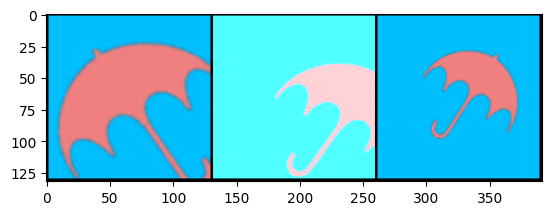

In [28]:
img_views = dm.val_transforms(img)

# make grid

plt.imshow(make_grid(torch.cat([img_views[0].unsqueeze(0), img_views[1].unsqueeze(0), img_views[2].unsqueeze(0)]), nrow=3).permute(1, 2, 0))

In [44]:

from pl_bolts.models.self_supervised import SimCLR

pil_to_tensor = transforms.ToTensor()

eval_gen = EmojiGenerator(rgb_colors, emoji_codes[:5], img_size=224, emoji_min_max_size=(30, 130), font_size=120)

# eval_enc = SimCLR.load_from_checkpoint('./lightning_logs/version_29/checkpoints/epoch=41-step=330000.ckpt', strict=False).encoder
eval_enc = SimCLR.load_from_checkpoint('https://pl-bolts-weights.s3.us-east-2.amazonaws.com/simclr/bolts_simclr_imagenet/simclr_imagenet.ckpt', strict=False).encoder

eval_enc.to(device)

eval_enc.eval()



/home/aray/miniconda3/lib/python3.9/site-packages/pytorch_lightning/utilities/migration/migration.py:195: PossibleUserWarning: You have multiple `ModelCheckpoint` callback states in this checkpoint, but we found state keys that would end up colliding with each other after an upgrade, which means we can't differentiate which of your checkpoint callbacks needs which states. At least one of your `ModelCheckpoint` callbacks will not be able to reload the state.
  rank_zero_warn(
Lightning automatically upgraded your loaded checkpoint from v1.0.4 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file https:/pl-bolts-weights.s3.us-east-2.amazonaws.com/simclr/bolts_simclr_imagenet/simclr_imagenet.ckpt`
/home/aray/miniconda3/lib/python3.9/site-packages/pytorch_lightning/core/saving.py:234: UnderReviewWarning: The feature SimCLR is currently marked under review. The compatibility with other Lightning projects is not guaran

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [28]:
# del eval_embs
# del eval_imgs
# gc.collect()
# with torch.no_grad():
#     torch.cuda.empty_cache()

In [11]:
# from numba import cuda
 
# cuda.select_device(0) # choosing second GPU 
# cuda.close()

In [45]:
import base64
from io import BytesIO

embeddings = []
labels = []
names = []
imgs64 = []
with torch.no_grad():
    eval_imgs = []
    for i in range(400):
        (img, _), params = gen.generate_random_image()

        buffer = BytesIO()
        img.resize((64, 64)).save(buffer, format='png')
        for_encoding = buffer.getvalue()
        imgs64.append(base64.b64encode(for_encoding).decode())

        labels.append(str(params[0]))
        names.append(f'{chr(emoji_codes[params[0]])} {emoji_names[params[0]]}')
        eval_imgs.append(pil_to_tensor(img).unsqueeze(0))
    eval_imgs = torch.concat(eval_imgs).to(device)
    embs = eval_enc(eval_imgs)
    embeddings.extend(torch.concat(embs).detach().cpu().numpy())
    del eval_imgs

embeddings = np.stack(embeddings)
embeddings.shape

(400, 2048)

In [46]:
import umap
from io import BytesIO
from PIL import Image

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Category10
from bokeh.models import Select
from bokeh.layouts import column
from bokeh.models.callbacks import CustomJS

output_notebook()

Loading BokehJS ...

In [47]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(embeddings)
embedding.shape

(400, 2)

In [48]:
color_mapping = CategoricalColorMapper(factors=[str(i) for i in range(10)],
                                       palette=Category10[9])

plot_figure = figure(
    plot_width=1100,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="""
  <div><img src='data:image/png;base64,@img' style='padding: 5px'/></div>
  <div>@name</div>
"""))

source = ColumnDataSource(data=dict(
    x=embedding[:, 0],
    y=embedding[:, 1],
    name=names,
    label=labels,
    img=imgs64
))


plot_figure.circle(
    'x',
    'y',
    source= source,
    color={'field': 'label', 'transform': color_mapping},
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4,
    legend='name'
)
show(plot_figure)

In [26]:
from datasets import load_dataset_builder

In [28]:
ds_builder = load_dataset_builder('imagenet-1k')

In [31]:
ds_builder.info.features['label']

ClassLabel(names=['tench, Tinca tinca', 'goldfish, Carassius auratus', 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'tiger shark, Galeocerdo cuvieri', 'hammerhead, hammerhead shark', 'electric ray, crampfish, numbfish, torpedo', 'stingray', 'cock', 'hen', 'ostrich, Struthio camelus', 'brambling, Fringilla montifringilla', 'goldfinch, Carduelis carduelis', 'house finch, linnet, Carpodacus mexicanus', 'junco, snowbird', 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 'robin, American robin, Turdus migratorius', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel, dipper', 'kite', 'bald eagle, American eagle, Haliaeetus leucocephalus', 'vulture', 'great grey owl, great gray owl, Strix nebulosa', 'European fire salamander, Salamandra salamandra', 'common newt, Triturus vulgaris', 'eft', 'spotted salamander, Ambystoma maculatum', 'axolotl, mud puppy, Ambystoma mexicanum', 'bullfrog, Rana catesbeiana', 'tree frog, tree-frog', 'tailed 

In [ ]:
  simclr_weight_path = ''
https://pl-bolts-weights.s3.us-east-2.amazonaws.com/simclr/bolts_simclr_imagenet/simclr_imagenet.ckpt